# 1. 신경망

* **신경망** : 여러 층으로 구성되고 시그모이드 함수 등의 매끈한 활성화 함수를 사용하는 네트워크. 입력층, 은닉층, 출력층으로 이루어짐.

## 1.1 활성화 함수의 개념

* **활성화 함수(activation function)** : 입력 신호의 총합을 출력 신호로 변환하는 함수  

조건 분기의 동작(0을 넘으면 1을 출력하고 그렇지 않으면 0을 출력)을 나타낸 함수  

$
y = h(b+w1x1 + w2x2)
$

$
h(x)=\left\{\begin{matrix}
0 & (x\leq 0)\\ 
1 & (x>  0)
\end{matrix}\right.
$  

뉴런을 그릴 때 보통은 뉴런을 하나의 원으로 그리지만 신경망의 동작을 더 명확히 드러내고자 할 때는 활성화 처리 과정을 명시하기도 함.

* **계단 함수** : 임계값을 경계로 출력이 바뀌는 함수
* **단순 퍼셉트론** : 단층 네트워크에서 계단함수를 활성화 함수로 사용한 모델
* **다층 퍼셉트론**  : 신경망

## 1.2 시그모이드 함수의 개념
* **시그모이드 함수(sigmoid function)** :  a mathematical function having a characteristic "S"-shaped curve or sigmoid curve.

## 1.3 계단 함수 구현

In [38]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

In [39]:
def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [40]:
step_function(np.array([-1.0, 1.0, 2.0]))

array([0, 1, 1])

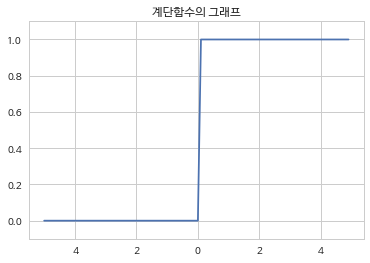

In [41]:
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt
%matplotlib inline

mpl.rc('font', family='NanumBarunGothic')

def step_function(x):
    return np.array(x > 0, dtype = np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.title('계단함수의 그래프')
plt.show()

계단처럼 0을 경계로 출력이 0에서 1(또는 1에서 0)로 바뀜.

## 1.4 시그모이드 함수 구현

In [44]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [45]:
x = np.array([-1, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

브로드캐스트를 통해 넘파이 배열과 스칼라값의 연산을 넘파이 배열의 원소 각각과 스칼라값의 연산으로 바꿔 수행함.

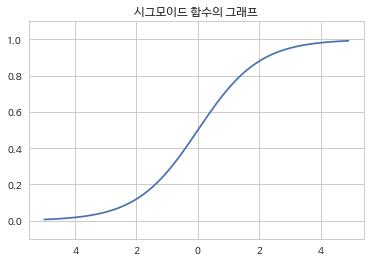

In [46]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.title('시그모이드 함수의 그래프')
plt.show()

S자 모양처럼 출력이 0에서 1로 연속적으로 바뀜

## 1.5 시그모이드 함수와 계단 함수 비교

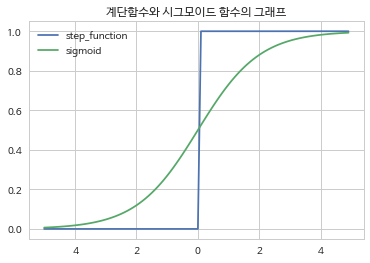

In [47]:
plt.plot(x, step_function(x), label = 'step_function')
plt.plot(x, sigmoid(x), label = 'sigmoid')
plt.title('계단함수와 시그모이드 함수의 그래프')
plt.legend()
plt.show()

### 계단함수와 시그모이드 함수의 비교
계단함수가 0과 1중 하나의 값만 돌려주는 반면 시그모이드 함수는 실수를 돌려줌.  
퍼셉트론에서는 뉴런 사이에 0 혹은 1이 흘렀다면, 신경망에서는 연속적인 실수가 흐름.  

그러나 두 함수는 매끄러움이라는 점에서는 다르지만 큰 관점에서 입력이 작아지면 출력은 0에 가깝고, 입력이 커지면 출력은 1에 가까움.  
입력이 아무리 작거나 커도 출력은 0에서 1사이임.

계단함수 $\sim$ 시시오도시  
시그모이드 함수 $\sim$ 물레방아

## 1.6 비선형 함수
* **함수** : 어떤 값을 입력하면 그에따른 값을 돌려주는 '변환기'  
* **선형 함수** : 함수에 무언가 입력했을 때 출력이 입력의 상수배만큼 변하는 함수 
$f(x) = ax + b  (a와 b는 상수)$
* **비선형 함수** : 선형 함수가 아닌 함수. 직선 1개로 그릴 수 없음

**신경망에서는 활성화 함수로 비선형 함수를 사용해야 함.**  
선형 함수를 이용하면 신경망의 층을 깊게 하는 의미가 없기 때문임.  
선형 함수의 문제는 층을 아무리 깊게 해도 '은닉층이 없는 네트워크'로도 똑같은 기능을 할 수 있음.  
그래서 층을 쌓은 혜택을 얻고 싶다면 활성화 함수로는 반드시 비선형 함수를 사용해야 함.

## 1.7 ReLU 함수

* **ReLU 함수(Rectified Linear Unit)** : 입력이 0이 넘으면 그 입력을 그대로 출력하고, 0 이하이면 0을 출력하는 함수.  

$h(x) = \left\{\begin{matrix}
x & (x > 0)\\ 
0 & (x \leq 0)
\end{matrix}\right.$

In [48]:
def relu(x):
    return np.maximum(0,x)

### 1.7.1 is ReLU linear or non-linear?
**Definitely it is not linear.**  
As a simple definition, linear function is a function which has same derivative for the inputs in its domain.  
A linear function has one independent variable and one dependent variable.  